In [ ]:
'''

Assignment 2: Mushroom Classification
Dataset: Mushroom
Link: https://raw.githubusercontent.com/epdrago/mushroom-dataset/master/mushrooms.csv
Task:
 Predict edible vs poisonous.
 Handle missing values (if any).
 Label encode all categorical features.
 Apply GaussianNB or MultinomialNB.
 Evaluate with confusion matrix.

'''

In [ ]:
'''
Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


'''

In [3]:
import pandas as pd

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('mushrooms.csv')  ## load the dataset

In [5]:
df  ## show the dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.columns  ## print column name of the dataset

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.info()  ## information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.isnull().sum()  ## check any value is missing in the column 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [10]:
le = LabelEncoder()  ## create object of label encoder

In [11]:
## fit and transform of this column using label encoder
df[['bruises','cap-color','cap-shape','cap-surface','class','gill-attachment','gill-color','gill-size','gill-spacing','habitat','odor','population','ring-type','spore-print-color','stalk-color-above-ring','stalk-color-below-ring','stalk-root','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring','veil-color','veil-type']] = df[['bruises','cap-color','cap-shape','cap-surface','class','gill-attachment','gill-color','gill-size','gill-spacing','habitat','odor','population','ring-type','spore-print-color','stalk-color-above-ring','stalk-color-below-ring','stalk-root','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring','veil-color','veil-type']] .apply(le.fit_transform)

In [12]:
df.head()  ## show new dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,o,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,o,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,o,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,o,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,o,0,3,0,1


In [13]:
oe = OrdinalEncoder(categories=[['n', 'o', 't']])  ## create object ordinal encoder of ring number

In [14]:
import numpy as np

In [15]:
np.unique(df['ring-number'])  ## show unique value of this column

array(['n', 'o', 't'], dtype=object)

In [16]:
oe.fit(df[['ring-number']])  ## fit this column on ordinal encoder

,categories,"[['n', 'o', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [17]:
df[['ring-number']] = oe.transform(df[['ring-number']])  ## transform categorical to numerical using ordinal encoder

In [18]:
df.info()  ## now show information of this new dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int32  
 1   cap-shape                 8124 non-null   int32  
 2   cap-surface               8124 non-null   int32  
 3   cap-color                 8124 non-null   int32  
 4   bruises                   8124 non-null   int32  
 5   odor                      8124 non-null   int32  
 6   gill-attachment           8124 non-null   int32  
 7   gill-spacing              8124 non-null   int32  
 8   gill-size                 8124 non-null   int32  
 9   gill-color                8124 non-null   int32  
 10  stalk-shape               8124 non-null   int32  
 11  stalk-root                8124 non-null   int32  
 12  stalk-surface-above-ring  8124 non-null   int32  
 13  stalk-surface-below-ring  8124 non-null   int32  
 14  stalk-co

In [19]:
x = df.drop(['class'],axis=1)

In [20]:
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  ## spliting 80% for training and 20% for testing

In [23]:
from sklearn.naive_bayes import CategoricalNB

In [24]:
c = CategoricalNB()  ## create object of categorica naive bayes

In [25]:
c.fit(x_train,y_train)  ## fit the model 

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [26]:
y_pred = c.predict(x_test)  ## predict the model

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
accuracy_score(y_test,y_pred)  ## check accuracy score

0.9569230769230769

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

[[849   3]
 [ 67 706]]


Text(50.72222222222221, 0.5, 'Actual')

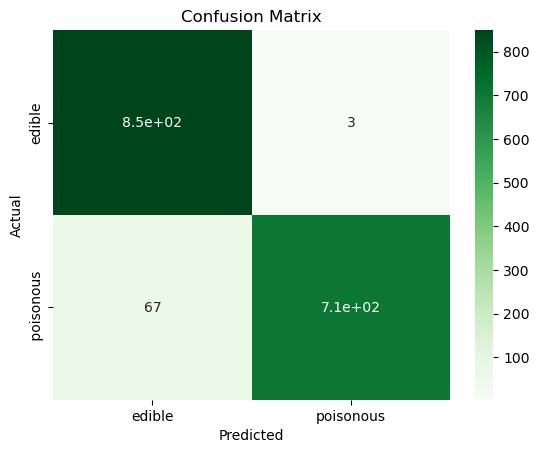

In [30]:
## show confusion matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,cmap='Greens',annot=True,xticklabels=['edible', 'poisonous'],yticklabels=['edible',' poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
print(classification_report(y_test,y_pred))  ## show classification report 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       852
           1       1.00      0.91      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [ ]:
'''

Model Interpretation :
            1. Data Preprocessing:
                    Missing values were handled properly, which helped avoid biased probability estimates in Naive Bayes.
                    Label Encoding and Ordinal Encoding were used carefully, making the dataset suitable for Categorical Naive Bayes, which works well with discrete categorical features.
                    Correct preprocessing ensured that the probabilistic assumptions of the model were not violated.
            2. Model Choice: Categorical Naive Bayes:
                    Categorical Naive Bayes is appropriate because:
                            Mushroom features are mostly categorical (odor, cap color, gill size, etc.).
                            The model efficiently estimates class probabilities using categorical frequency counts.
                    The assumption of feature independence is acceptable for this dataset and often performs well in practice.
            3. Overall Accuracy (96%):
                    The model achieves 96% accuracy, meaning:
                        96 out of every 100 mushrooms are classified correctly.
                    This indicates a strong overall performance for a classification task involving safety-critical outcomes (edible vs poisonous).
            4. Precision Analysis:
                    Class 0 (Edible): Precision = 0.93
                        When the model predicts “edible”, it is correct 93% of the time.
                    Class 1 (Poisonous): Precision = 1.00
                        When the model predicts “poisonous”, it is 100% correct.
                    This means the model is extremely reliable when warning about poisonous mushrooms.
            5. Recall Analysis:
                    Class 0 (Edible): Recall = 1.00
                        Almost all edible mushrooms are correctly identified.
                    Class 1 (Poisonous): Recall = 0.91
                        91% of poisonous mushrooms are correctly detected.
                        About 9% of poisonous mushrooms are missed, which is a concern.
            6. F1-Score Interpretation:
                    Class 0 F1-Score = 0.96
                    Class 1 F1-Score = 0.95
                    High F1-scores indicate a good balance between precision and recall for both classes.
            7. Macro and Weighted Averages:
                    Macro Average F1 = 0.96
                        The model performs consistently across both classes.
                    Weighted Average F1 = 0.96
                        Class imbalance (if any) does not significantly affect performance.
                

'''

In [ ]:
'''

Model Conclusion:
            1. The Categorical Naive Bayes model is well-suited for the mushroom dataset due to its categorical nature.
            2. Proper handling of missing values and correct encoding significantly improved model performance.
            3. An accuracy of 96% indicates the model is highly effective.
            4. The model shows excellent precision for poisonous mushrooms, making it reliable for issuing warnings.
            5. The main limitation is the presence of false negatives (poisonous predicted as edible), which can be risky in real-world use.
            6. Despite this, the model maintains a strong balance between precision and recall, as shown by high F1-scores.
            7. The model is computationally efficient, simple, and interpretable.
            8. Overall, this model is robust and reliable, but further optimization (feature selection or ensemble models) could reduce false negatives.

'''